# Text Processing – Long Titles from Philippines Senate Bills

In [1]:
import pandas as pd
import numpy as np
import os
import re
import string
from nltk import word_tokenize
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords

Pandas Display Options Settings

In [2]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# pd.set_option('display.max_colwidth', -1)

## Loading the Data

In [3]:
df = pd.read_csv(os.path.join('data_files',
                              'bills_data_set.csv'), index_col=0)
print(f"Dataframe has {df.shape[0]:,}",
      f"observations and {df.shape[1]} dimensions.")

Dataframe has 15,078 observations and 22 dimensions.


In [4]:
df['bill_status'] = np.where(df.Pass == True,
                             "Passed",
                             np.where(df.status == 'Sent to the Archives',
                                      "Archived",
                                      "Pending"))

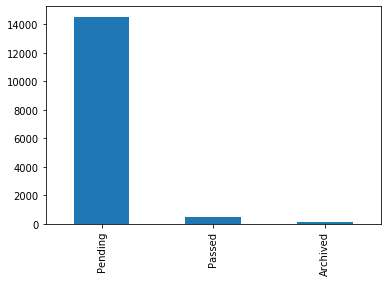

In [5]:
df.bill_status.value_counts(dropna=False).plot(kind='bar')

## Cleaning Data

### Feature Filtering

In [6]:
df = df[['bill_id', 'long_title', 'bill_status']]
df.head()

,bill_id,long_title,bill_status
0,17SBN-2235,an act establishing the fiscal regime for the ...,Pending
1,17SBN-2234,an act authorizing the sale of certain parcels...,Passed
2,17SBN-2233,an act increasing the excise tax on tobacco pr...,Passed
3,17SBN-2232,"an act mandating the institutionalization, dev...",Pending
4,17SBN-2231,an act strengthening the al-amanah islamic bank,Pending


### Punctuations and Numbers Removal

In [7]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,
    remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [8]:
df['long_title'] = df.long_title.map(clean_text)
df.head()

,bill_id,long_title,bill_status
0,17SBN-2235,an act establishing the fiscal regime for the ...,Pending
1,17SBN-2234,an act authorizing the sale of certain parcels...,Passed
2,17SBN-2233,an act increasing the excise tax on tobacco pr...,Passed
3,17SBN-2232,an act mandating the institutionalization deve...,Pending
4,17SBN-2231,an act strengthening the alamanah islamic bank,Pending


### Tokenization of Words 

In [9]:
df['long_title'] = df.long_title.map(word_tokenize)
df.head()

,bill_id,long_title,bill_status
0,17SBN-2235,"[an, act, establishing, the, fiscal, regime, f...",Pending
1,17SBN-2234,"[an, act, authorizing, the, sale, of, certain,...",Passed
2,17SBN-2233,"[an, act, increasing, the, excise, tax, on, to...",Passed
3,17SBN-2232,"[an, act, mandating, the, institutionalization...",Pending
4,17SBN-2231,"[an, act, strengthening, the, alamanah, islami...",Pending


### Removal of Non-English Words

In [10]:
eng_words = set(words.words())
df['long_title'] = df.long_title.map(lambda lt:
                                     [word for word in lt
                                      if word in eng_words])
df.head()

,bill_id,long_title,bill_status
0,17SBN-2235,"[an, act, the, fiscal, regime, for, the, minin...",Pending
1,17SBN-2234,"[an, act, the, sale, of, certain, of, land, in...",Passed
2,17SBN-2233,"[an, act, increasing, the, excise, tax, on, to...",Passed
3,17SBN-2232,"[an, act, the, institutionalization, developme...",Pending
4,17SBN-2231,"[an, act, strengthening, the, bank]",Pending


### Word Lemmatizer

In [11]:
lemma = WordNetLemmatizer()
df['long_title'] = df.long_title.map(lambda lt: [lemma.lemmatize(word)
                                                 for word in lt])
df.head()

,bill_id,long_title,bill_status
0,17SBN-2235,"[an, act, the, fiscal, regime, for, the, minin...",Pending
1,17SBN-2234,"[an, act, the, sale, of, certain, of, land, in...",Passed
2,17SBN-2233,"[an, act, increasing, the, excise, tax, on, to...",Passed
3,17SBN-2232,"[an, act, the, institutionalization, developme...",Pending
4,17SBN-2231,"[an, act, strengthening, the, bank]",Pending


### Part of Speech Tagging

In [12]:
df['long_title'] = df.long_title.map(pos_tag)
df.head()

,bill_id,long_title,bill_status
0,17SBN-2235,"[(an, DT), (act, NN), (the, DT), (fiscal, JJ),...",Pending
1,17SBN-2234,"[(an, DT), (act, NN), (the, DT), (sale, NN), (...",Passed
2,17SBN-2233,"[(an, DT), (act, NN), (increasing, VBG), (the,...",Passed
3,17SBN-2232,"[(an, DT), (act, NN), (the, DT), (institutiona...",Pending
4,17SBN-2231,"[(an, DT), (act, NN), (strengthening, VBG), (t...",Pending


In [13]:
df['long_title'] = df.long_title.map(lambda lt:
                                     [word for word in lt
                                      if (word[1].startswith(('N', 'J')))])
df.head()

,bill_id,long_title,bill_status
0,17SBN-2235,"[(act, NN), (fiscal, JJ), (regime, NN), (minin...",Pending
1,17SBN-2234,"[(act, NN), (sale, NN), (certain, JJ), (land, ...",Passed
2,17SBN-2233,"[(act, NN), (excise, NN), (tax, NN), (tobacco,...",Passed
3,17SBN-2232,"[(act, NN), (institutionalization, NN), (devel...",Pending
4,17SBN-2231,"[(act, NN), (bank, NN)]",Pending


In [14]:
df['long_title'] = df.long_title.map(lambda lt:
                                     [_[0] for _ in lt])
df.head()

,bill_id,long_title,bill_status
0,17SBN-2235,"[act, fiscal, regime, mining, industry]",Pending
1,17SBN-2234,"[act, sale, certain, land, barangay, na, ligas...",Passed
2,17SBN-2233,"[act, excise, tax, tobacco, subject, tax, incr...",Passed
3,17SBN-2232,"[act, institutionalization, development, train...",Pending
4,17SBN-2231,"[act, bank]",Pending


### Removal of Stop Words

In [15]:
stoppers = stopwords.words('english')
useless = ['act', 'presidential', 'code', 'government', 'therefore', 'penal',
           'thereof', 'article', 'provision', 'therefore', 'decree',
           'republic', 'purpose', 'therefor', 'therefrom', 'thereon',
           'thereto', 'thereunder', 'therewith', 'thing', 'title',
           'usage', 'use', 'used', 'useful', 'user', 'whomsoever', 'year',
           'yearly', 'session', 'president', 'presidential', 'political',
           'policy', 'plenary', 'plebiscite', 'ordinance', 'order', 'orderly',
           'official', 'officer', 'office', 'oath', 'providing', 'executive']
stoppers.extend(useless)

In [16]:
df['long_title'] = df.long_title.map(lambda lt:
                                     [word for word in lt
                                      if word not in stoppers])
df.head()

,bill_id,long_title,bill_status
0,17SBN-2235,"[fiscal, regime, mining, industry]",Pending
1,17SBN-2234,"[sale, certain, land, barangay, na, ligas, cit...",Passed
2,17SBN-2233,"[excise, tax, tobacco, subject, tax, increment...",Passed
3,17SBN-2232,"[institutionalization, development, training, ...",Pending
4,17SBN-2231,[bank],Pending


Dropping observations with resulting 'long_title' length equal to 0.


In [17]:
df.drop(df[df.long_title.map(len) == 0].index, inplace=True)

In [18]:
df.to_pickle(os.path.join('data_files', 'lt_processed.pkl'))